In [2]:
# https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# df = pd.read_csv("./cleaned_soccer_data_v1.csv",index_col=0)
df = pd.read_csv("../../datasets/cleaned_soccer_data_2016_v3_with general_labels.csv",index_col=0)
print(df.head())
print(df.columns)
print(df["player_positions_general"])



    id  player_fifa_api_id  player_api_id        date  overall_rating  \
0    1              218353         505942  2016-02-18            67.0   
1    6              189615         155782  2016-04-21            74.0   
2   65              140161          30572  2016-04-21            69.0   
3   88               17725          23780  2015-12-24            70.0   
4  113              158138          27316  2016-04-28            77.0   

   potential  crossing  finishing  heading_accuracy  short_passing  ...  \
0       71.0      49.0       44.0              71.0           61.0  ...   
1       76.0      80.0       53.0              58.0           71.0  ...   
2       69.0      57.0       21.0              68.0           65.0  ...   
3       70.0      46.0       34.0              73.0           65.0  ...   
4       77.0      77.0       72.0              64.0           79.0  ...   

   weight  preferred_foot_left  preferred_foot_right  \
0     187                    0                     1  

In [3]:
player_positions_general = df["player_positions_general"]
player_positions_detailed = df["player_positions"]

df.drop("player_positions_general",1)
ohe_positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
df = df.drop("player_positions",1)
df = df.drop("player_positions_general",1)
player_fifa_id=df["player_fifa_api_id"]
df = df.drop("player_fifa_api_id",1)
df = df.drop("player_api_id",1)
df = df.drop("id",1)
df = df.drop("player_name",1)
df = df.drop("date",1)

In [4]:
# drop if we dont want features in the labels
df = df.drop(ohe_positions,1)

In [5]:
# ensure all columns are numeric
print(df.dtypes)

overall_rating                float64
potential                     float64
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility                       float64
reactions                     float64
balance                       float64
shot_power                    float64
jumping                       float64
stamina                       float64
strength                      float64
long_shots                    float64
aggression                    float64
interceptions                 float64
positioning                   float64
vision                        float64
penalties   

In [6]:
player_positions_general
player_positions_general.unique()

array(['DEF', 'MID', 'ATK', 'GK'], dtype=object)

In [7]:
clf = LinearDiscriminantAnalysis()
df_lda = clf.fit_transform(df,player_positions_detailed)

df_lda

array([[-2.71992047, -3.23118676, -2.06446654, ...,  0.41847616,
         0.10044002, -0.68247858],
       [-2.83665105, -2.67217939,  2.37614612, ...,  0.8477011 ,
        -0.24123885,  0.02307217],
       [-1.01982179, -4.52334328, -1.82892491, ..., -2.25475036,
        -0.79825832, -0.95600068],
       ...,
       [-2.1466897 ,  3.81557793,  1.21141935, ...,  0.26175598,
        -0.55441286, -0.32406127],
       [-1.84028139,  3.61822183,  0.71369582, ...,  0.85089795,
         0.67654364, -1.87034059],
       [-1.87806947, -4.35087617, -1.2017527 , ..., -0.11492591,
         0.4658253 , -0.36139725]])

In [8]:
df_lda.shape


(6358, 42)

<ipython-input-9-fcb2efb895d5>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def scatter_lda_sns(df,df_pca,num_pc,labels=pd.Series()):


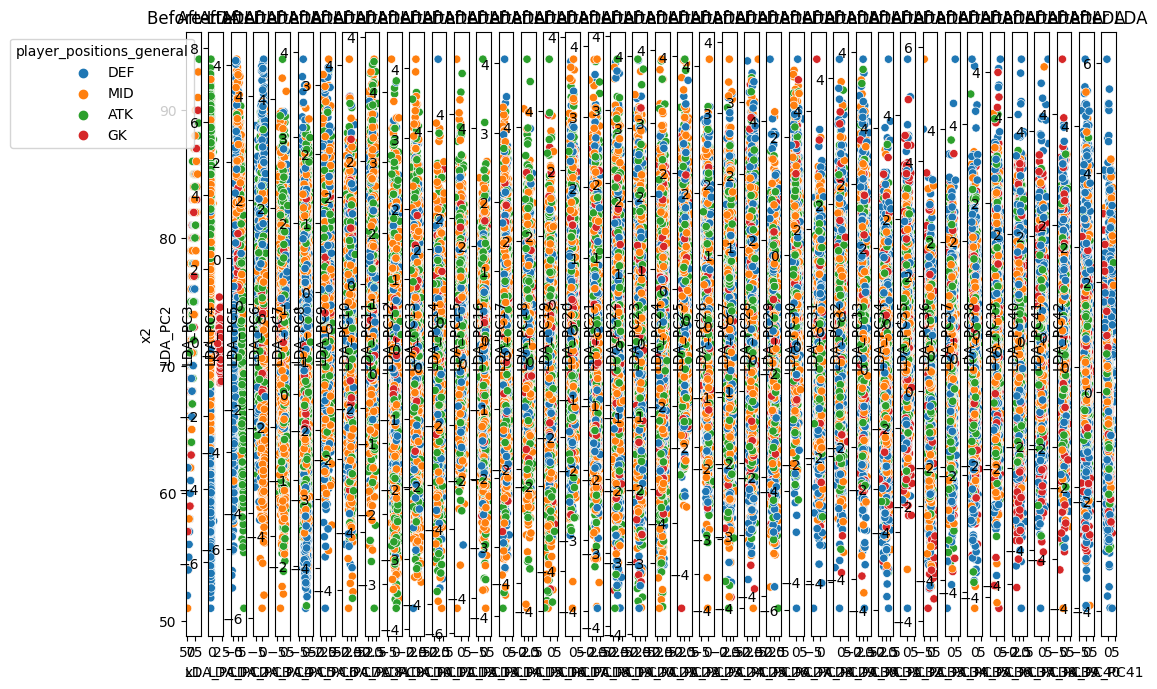

In [9]:
def scatter_lda_sns(df,df_pca,num_pc,labels=pd.Series()):
    fig, axes = plt.subplots(1,num_pc)
    if not labels.empty:
        sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue=labels,ax=axes[0])
    else:
        sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1],ax=axes[0])
    axes[0].set_xlabel('x1')
    axes[0].set_ylabel('x2')
    axes[0].set_title('Before LDA')
    for i in range(1,num_pc):
        if not labels.empty:
            sns.scatterplot(data=df_pca, x=df_pca[:,i-1], y=df_pca[:,i], hue=labels,ax=axes[i],legend=False)
        else:
            sns.scatterplot(data=df, x=df_pca[:,i-1], y=df_pca[:,i],ax=axes[i],legend=False)
        axes[i].set_xlabel('LDA_PC{}'.format(i))
        axes[i].set_ylabel('LDA_PC{}'.format(i+1))
        axes[i].set_title('After LDA')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
# scatter_pca_sns(df,df_pca,num_pc,labels=player_positions_detailed)
scatter_lda_sns(df,df_lda,df_lda.shape[1],labels=player_positions_general)

In [10]:

# def biplot(df,score,coeff,num_pc,labels=None):
#     '''
#     score: the projected data
#     coeff: the eigenvectors (PCs)
#     pcax: pca1 index
#     pcay: pca2 index
#     '''
#     for i in range(0,num_pc-1):
#         pca1=i
#         pca2=i+1
#         xs = score[:,i]
#         ys = score[:,i+1]
#         n=coeff.shape[0]
#         scalex = 1.0/(xs.max()- xs.min())
#         scaley = 1.0/(ys.max()- ys.min())
#         if labels is None:
#             sns.scatterplot(data=score, x=xs*scalex, y=ys*scaley)
#         else:
#             sns.scatterplot(data=score, x=xs*scalex, y=ys*scaley, hue=labels)
#         for j in range(n): #feature explain variance
#             plt.arrow(0, 0, coeff[j,pca1], coeff[j,pca2],color='r',alpha=0.9) 
#             if labels is None:
#                 plt.text(coeff[j,pca1]* 1.15, coeff[j,pca2] * 1.15,  list(df.columns)[j], color='g', ha='center', va='center')
#             else:
#                 plt.text(coeff[j,pca1]* 1.15, coeff[j,pca2] * 1.15, list(df.columns)[j], color='g', ha='center', va='center')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.xlabel("LDA_PC{}".format(pca1+1))
#         plt.ylabel("LDA_PC{}".format(pca2+1))
#         plt.grid()
#         plt.show()

# # Call the biplot function for any number of PCs
# biplot(df,df_pca, np.transpose(pca.components_),df_pca.shape[1],player_positions_general)


In [11]:
columns=["LDA_PC{}".format(i) for i in range(1,df_lda.shape[1]+1)]
df_lda = pd.DataFrame(df_lda,columns=columns,index=df.index)
print(df_lda.head())

    LDA_PC1   LDA_PC2   LDA_PC3   LDA_PC4   LDA_PC5   LDA_PC6   LDA_PC7  \
0 -2.719920 -3.231187 -2.064467 -0.070135 -2.153782 -0.467022 -1.415772   
1 -2.836651 -2.672179  2.376146  3.147144 -0.044590  1.308416 -0.822004   
2 -1.019822 -4.523343 -1.828925 -0.106660 -1.443644 -0.873780  0.530965   
3 -1.617575 -4.856155 -2.945825 -0.353930 -0.510797 -0.427046 -0.072336   
4 -1.398834  3.657507  1.204130 -0.463391  0.459694  2.169088  1.198253   

    LDA_PC8   LDA_PC9  LDA_PC10  ...  LDA_PC33  LDA_PC34  LDA_PC35  LDA_PC36  \
0 -1.066637 -0.392626 -0.926577  ... -0.266434 -0.555215 -2.165764 -0.032899   
1  0.446822 -0.281568  0.169204  ...  0.530503 -0.703962  0.768027  0.861496   
2  1.182204 -1.141854  0.166081  ...  1.561976  0.579247 -2.509962  2.689023   
3  0.513706 -0.184841 -0.456105  ... -0.159197  0.489998  0.296252  2.241386   
4 -0.867736 -0.452581 -1.152963  ...  0.809462 -1.536450  1.416330 -0.914054   

   LDA_PC37  LDA_PC38  LDA_PC39  LDA_PC40  LDA_PC41  LDA_PC42  
0  0

In [12]:
df_final = df_lda
df_final["player_fifa_api_id"]=player_fifa_id
df_final["player_positions"] = player_positions_detailed
df_final["player_positions_general"] = player_positions_general
df_final

,LDA_PC1,LDA_PC2,LDA_PC3,LDA_PC4,LDA_PC5,LDA_PC6,LDA_PC7,LDA_PC8,LDA_PC9,LDA_PC10,...,LDA_PC36,LDA_PC37,LDA_PC38,LDA_PC39,LDA_PC40,LDA_PC41,LDA_PC42,player_fifa_api_id,player_positions,player_positions_general
0,-2.719920,-3.231187,-2.064467,-0.070135,-2.153782,-0.467022,-1.415772,-1.066637,-0.392626,-0.926577,...,-0.032899,0.023300,-0.607117,1.884155,0.418476,0.100440,-0.682479,218353,CB,DEF
1,-2.836651,-2.672179,2.376146,3.147144,-0.044590,1.308416,-0.822004,0.446822,-0.281568,0.169204,...,0.861496,-0.214361,0.721046,0.127230,0.847701,-0.241239,0.023072,189615,LB,DEF
2,-1.019822,-4.523343,-1.828925,-0.106660,-1.443644,-0.873780,0.530965,1.182204,-1.141854,0.166081,...,2.689023,-1.574170,-0.720701,0.848310,-2.254750,-0.798258,-0.956001,140161,"CB, RB",DEF
3,-1.617575,-4.856155,-2.945825,-0.353930,-0.510797,-0.427046,-0.072336,0.513706,-0.184841,-0.456105,...,2.241386,0.369035,0.307744,-0.278059,-0.283471,0.025885,-1.795962,17725,CB,DEF
4,-1.398834,3.657507,1.204130,-0.463391,0.459694,2.169088,1.198253,-0.867736,-0.452581,-1.152963,...,-0.914054,-0.660580,0.508823,0.448629,0.510699,0.396636,-0.001646,158138,"CAM, CM, LM",MID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,-2.568563,4.038766,1.120707,0.426766,-1.862563,2.337459,0.332486,-0.168584,0.626593,-1.781286,...,1.214361,0.192009,-0.065067,0.435947,-0.511096,-0.243167,-0.187067,179712,"RM, LM, CAM",MID
6354,-2.236150,0.561127,-2.037762,-0.894163,2.206501,0.023568,-1.081539,-0.589792,-0.355477,-1.499748,...,-0.419688,0.347494,0.628497,1.008669,-0.332957,0.836211,-1.021299,219943,ST,ATK
6355,-2.146690,3.815578,1.211419,0.764462,-1.474408,2.178364,-1.507989,0.813233,0.616119,-0.452190,...,-0.206656,-0.349856,0.161889,-1.687243,0.261756,-0.554413,-0.324061,105454,RM,MID
6356,-1.840281,3.618222,0.713696,3.347161,2.049061,0.867121,2.610342,1.117139,3.607444,0.546428,...,0.542816,1.316894,-1.287097,0.272812,0.850898,0.676544,-1.870341,195840,"LM, LW",ATK


In [13]:
df_final.to_csv("./soccer_player_embeddings_feature_no_labels_LDA.csv")